# Analyse du Data Set OpenFoodFatcs
### Ressources utilisées:
- document word contenant les 162 variables
- https://de.openfoodfacts.org/nutrition-score-france

> d'après le lien ci-dessus, peu de variables (une douzaine environ) entrent en jeu dans le calcul du nutriscore (faire la différence entre le nutriscore (nombre) et le nutrigrade (lettre)

1) Pour les points A:
- energie, graisses saturées, sucres et sodium

2) Pour les points C:
- fuits-legumes-noix , fibres, proteines

et on fait la différence (en général) entre les points A et les points C pour avoir le nutriscore (le chiffre)

au final, on veut pouvoir renseigner, pour un produit donné, son "nutrigrade" (par une lettre de A à E)


## 1) Exploratory Data Analysis

### Checklist de base
#### Analyse de forme
- **variable target**: 'nutrition_grade_fr'
- **lignes et colonnes**: 320772, 162
- **types de variables**: 106 quantitatives (continues), 56 catégorielles

#### Analyse de fond
- **visualisation de la target**: nutrition_grade_fr / nutrition-score-fr_100g
- **signification des variables**: elles servent au calcul du nutriscore
- **relations variables/target**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_brut=pd.DataFrame()
df_brut = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t", low_memory=False)

In [3]:
df_travail = df_brut.copy()

### Analyse de la forme des données

In [4]:
df_travail.shape

(320772, 162)

In [5]:
df_travail.dtypes.value_counts()

float64    106
object      56
dtype: int64

<AxesSubplot:ylabel='None'>

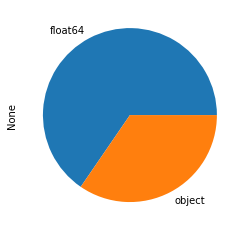

In [6]:
df_travail.dtypes.value_counts().plot.pie()

#### Visualisation des valeurs manquantes

<AxesSubplot:>

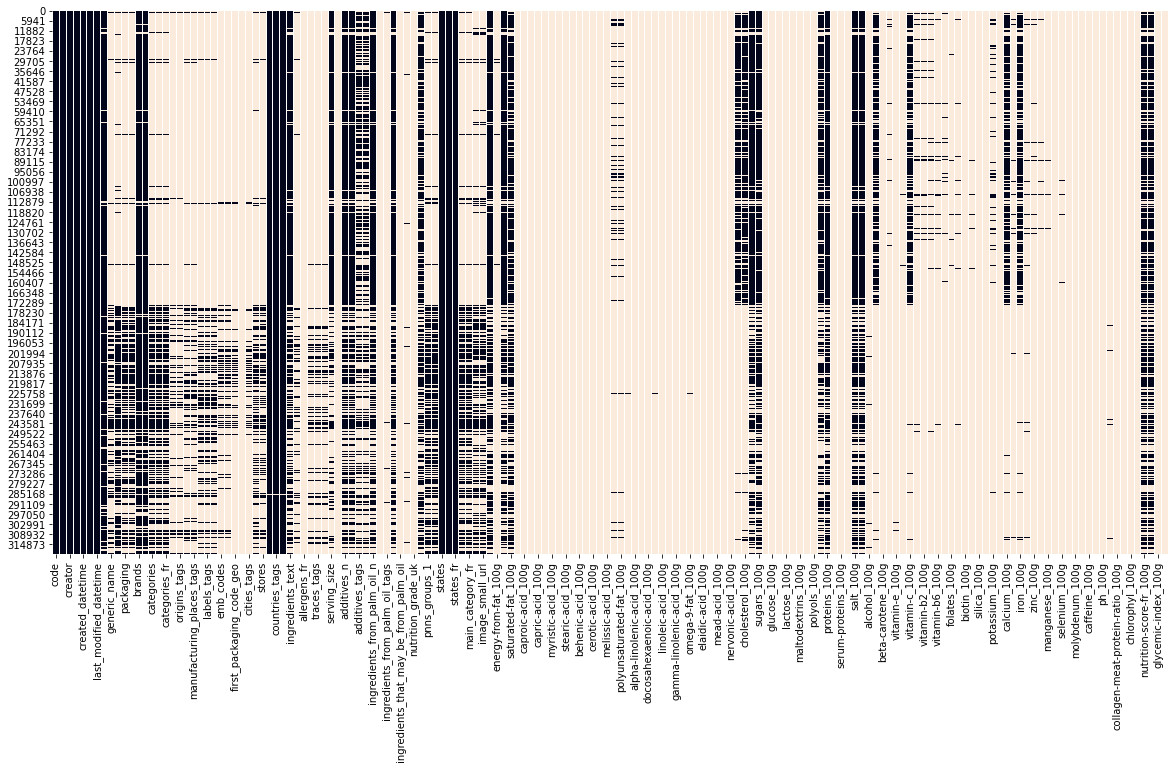

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df_travail.isna(), cbar= False)

#### Remarque:
Ce tableau nous permet de visualiser toutes les valeurs manquantes parmi notre Dataset. On pourrait s'imaginer faire le tri des colonnes selon le nombre (ratio) de valeurs manquantes mais je vais procéder différemment:
- je ne vais garder que les colonnes intéressantes au vu du document dont le lien est au début de ce notebook
- sachant que le nutrigrade correspond aux produits vendus en France, je ne vais garder que les "individus" ayant France pour pays de vente. nous avons pour cela 2 catégories différentes: "countries_fr" et "countries" que l'on compare:

In [8]:
df_travail['countries_fr'].value_counts()

États-Unis                                          172998
France                                               94392
Suisse                                               14953
Allemagne                                             7870
Espagne                                               5009
                                                     ...  
République tchèque,Slovaquie,Suisse                      1
Autriche,Espagne                                         1
Belgique,France,Italie,Maroc,Suisse,Royaume-Uni          1
Croatie,France                                           1
Belgique,France,Allemagne,Arabie saoudite,Suisse         1
Name: countries_fr, Length: 722, dtype: int64

In [9]:
df_travail['countries'].value_counts()

US                                            169928
France                                         77292
en:FR                                          16979
Suisse                                         12314
Deutschland                                     6161
                                               ...  
Tschechien,Dänemark,Frankreich,Deutschland         1
Australia,Indonesia,United States                  1
en:IT, en:switzerland                              1
France, Guyane                                     1
Deutschland,Griechenland                           1
Name: countries, Length: 1434, dtype: int64

**Le premier tableau semble plus "parlant" que le second, je ne garderai que les valeurs correspondant à "contries_fr", d'autant plus qu'il contient plus de valeurs associées à "France"**

In [10]:
df_travail = df_travail[df_travail.countries_fr == 'France']

In [11]:
df_travail.shape

(94392, 162)

In [12]:
df_travail['labels_fr'].value_counts()

Bio,Bio européen,AB Agriculture Biologique                                                                                  5253
Point Vert                                                                                                                  2073
Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique                                                                         822
Point Vert,Eco-emballages                                                                                                    797
Labels de distributeurs,Sélection Intermarché                                                                                448
                                                                                                                            ... 
Sans colorants,Sans conservateurs,Sans additifs,Produit en Bretagne                                                            1
Huile de palme durable,Cereales-stockees-sans-pesticide-de-synthese                              

**j'ai donc ainsi éliminé plus des 2/3 du Dataset: c'est un choix que j'ai expliqué plus haut**

### Choix (élimination) des variables facultatives

Comme expliqué au tout début, le nutriscore se calcule en fonction des points A et C: je ne garderai, comme variables quantitatives, que celles évoquées plus haut.

Quant aux variables qualitatives, je vais regarder de plus près celles qui se terminent en"xx_fr": après étude, seules 2 me semblent pertinentes: "product_name" et "nutrition_grade_fr". J'aurais pu espérer une (plusieurs) variables permettant d'adapter le calcul nutritionnel aux formules du Pr Hercberg, mais rien ne m'a semblé pertinent

In [13]:
df_travail2 = df_travail[[ 'product_name', 'categories', 'nutrition_grade_fr', 'energy_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g']]

In [14]:
df_travail2.shape

(94392, 12)

In [15]:
df_travail2.head(25)

product_name  \
0                       Farine de blé noir   
46                           Filet de bœuf   
48                                     NaN   
136                                Twix x2   
182                      lentilles vertes    
183                                    NaN   
184      Biscuits sablés fourrage au cacao   
187                                    NaN   
188  Thé de Noël aromatisé orange-cannelle   
189           Sirops pour ganache macarons   
190                         Mini Confettis   
191             Praliné Amande Et Noisette   
194                  Côte du Rhône village   
224                           Bonbon Vichy   
225                    M&m's peanut butter   
226                  Pepsi, Nouveau goût !   
227                                    NaN   
232                    BoFrost Nudelpfanne   
234              Tarte Poireaux Et Lardons   
240                                    7Up   
242                      Madeleines nature   
271                    Terrine de campagne   
279                          Cakes Raisins   
280                                    NaN   
283                       Cakes aux Fruits   

                                            categories nutrition_grade_fr  \
0                                                  NaN                NaN   
46                                       Filet de bœuf                NaN   
48                                                 NaN                NaN   
136                                                NaN                NaN   
182  Aliments et boissons à base de végétaux,Alimen...                NaN   
183                                          Root bier                NaN   
184  Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés                NaN   
187                                            Bonbons                NaN   
188  Aliments et boissons à base de végétaux,Boisso...                NaN   
189                         Sirops,Sirops pour ganache                NaN   
190                                                NaN                  d   
191                                                NaN                  d   
194                                                NaN                NaN   
224                                                NaN                NaN   
225                                                NaN                NaN   
226                                      Sodas au cola                  e   
227                                                NaN                NaN   
232                                                NaN                NaN   
234                                                NaN                  d   
240                   Sodas au citron,Boissons sucrées                  e   
242  Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...                  d   
271                                                NaN                NaN   
279                    Cakes aux raisins,Cakes,Gâteaux                  d   
280                                                NaN                NaN   
283  Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...                  d   

     energy_100g  proteins_100g  sugars_100g  fat_100g  saturated-fat_100g  \
0            NaN            NaN          NaN       NaN                 NaN   
46           NaN            NaN          NaN       NaN                 NaN   
48           NaN            NaN          NaN       NaN                 NaN   
136          NaN            NaN          NaN       NaN                 NaN   
182          NaN            NaN          NaN       NaN                 NaN   
183          NaN            NaN          NaN       NaN                 NaN   
184          NaN            NaN          NaN       NaN                 NaN   
187          NaN            NaN          NaN       NaN                 NaN   
188          NaN            NaN          NaN       NaN                 NaN   
189          NaN            NaN          NaN      

**on voit plusieurs lignes avec seulement des Nan**:

<AxesSubplot:>

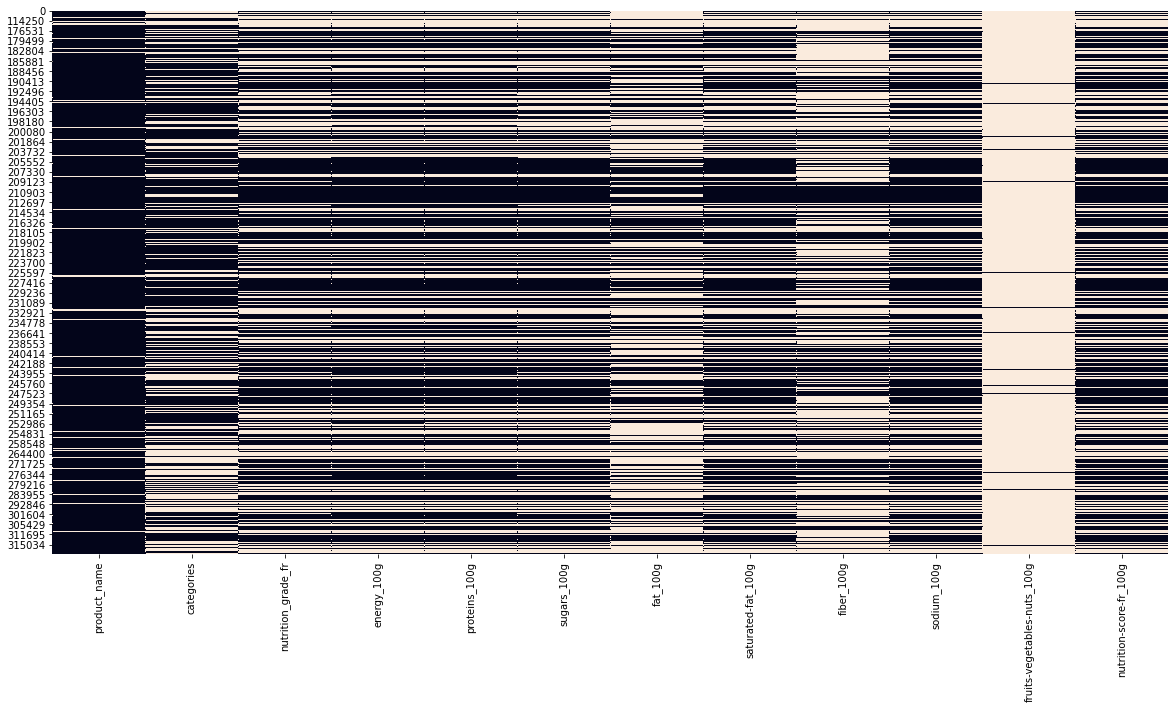

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df_travail2.isna(), cbar= False)

**on remarque déjà que la variables "fruits...." est quasi vide: on pourrait remplir les "trous" de zéros, mais au vu du document du Pr Hercberg qui précise que "les noix et fruits à coque ne sont pas pris en compte pour le calcul de la teneur en fruits et légumes", ce qui limite la portée de l'interet de cette colonne et d'éventuellement la combler (par ex de zéros) je préfère me séparer de cette dernière**

In [17]:
df_travail2 = df_travail2.drop(['fruits-vegetables-nuts_100g'], axis=1)
df_travail2.shape

(94392, 11)

**à présent on élimine les lignes dans lesquelles toutes les valeurs sont Nan**

In [18]:
df_travail2 = df_travail2.dropna(how='all', axis = 0)
df_travail2.shape

(88062, 11)

<AxesSubplot:>

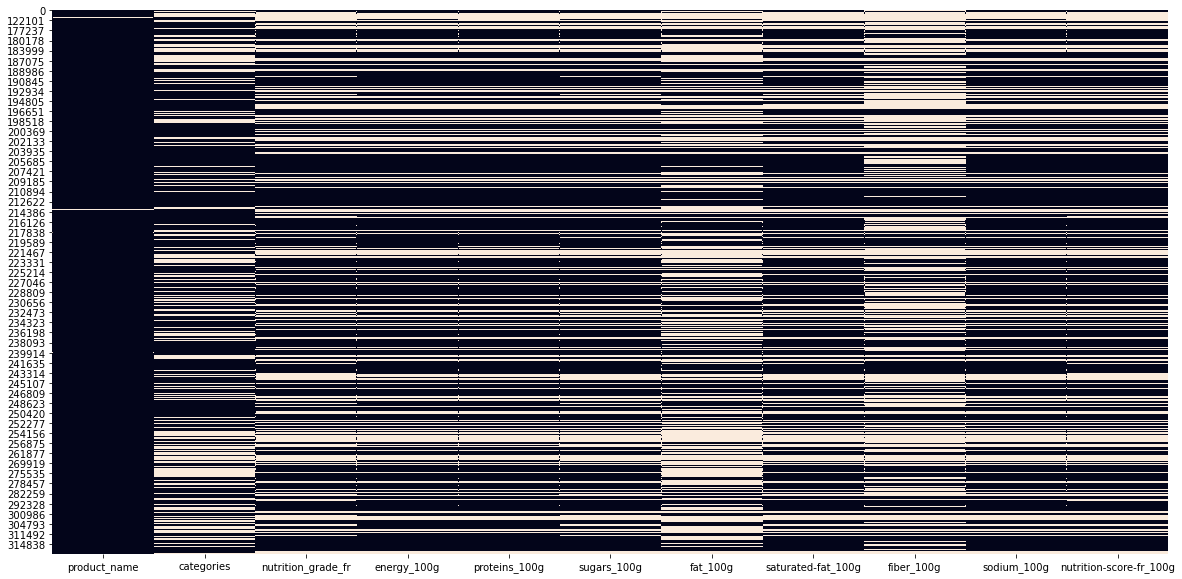

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df_travail2.isna(), cbar= False)

In [20]:
df_travail2.shape

(88062, 11)

In [21]:
df_travail2['nutrition_grade_fr'].value_counts()

d    16172
c    12631
e    11064
a     9803
b     8831
Name: nutrition_grade_fr, dtype: int64

In [22]:
df_travail2['nutrition_grade_fr'].value_counts().sum()

58501

**Nous avons donc environ 30000 Nan pour le nutrigrade**

je fais une autre copie (numero 3) du df_travail des fois que je sois obligé de revenir à cette étape...

In [23]:
df_travail3 = df_travail2.copy()

**A présent j'élimine les valeurs manquantes de la colonne correspondant au nutrigrade**

In [24]:
df_travail3 = df_travail3.dropna(subset=['nutrition_grade_fr'])

In [25]:
df_travail3.shape

(58501, 11)

**Puis j'élimine les doublons**

In [26]:
df_travail3 = df_travail3.drop_duplicates()

In [27]:
df_travail3.shape

(58185, 11)

<AxesSubplot:>

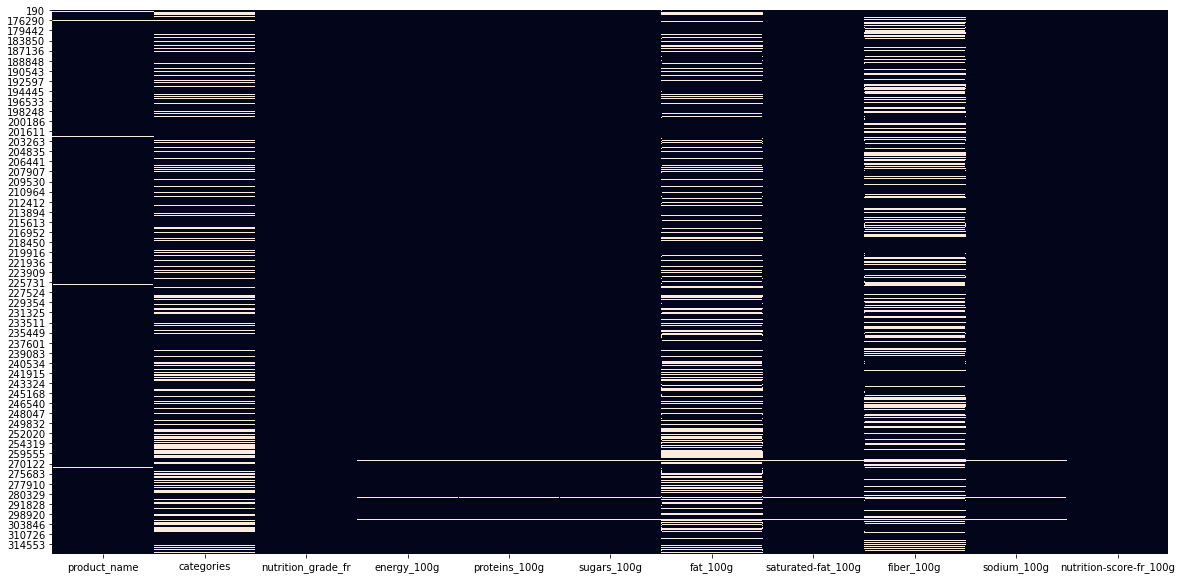

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(df_travail3.isna(), cbar= False)

In [29]:
df_travail3.describe()

energy_100g  proteins_100g   sugars_100g      fat_100g  \
count  5.811400e+04   58114.000000  58114.000000  41139.000000   
mean   1.177851e+03       7.777226     13.202414     13.248042   
std    1.352981e+04       7.880345     18.959685     16.751020   
min    0.000000e+00       0.000000     -0.100000      0.000000   
25%    4.340000e+02       1.900000      1.000000      1.400000   
50%    1.033000e+03       6.000000      4.000000      6.900000   
75%    1.648000e+03      11.000000     17.000000     21.000000   
max    3.251373e+06     100.000000    104.000000    380.000000   

       saturated-fat_100g    fiber_100g   sodium_100g  nutrition-score-fr_100g  
count        58114.000000  42596.000000  58114.000000             58185.000000  
mean             5.398351      2.509733      0.428347                 8.597353  
std              8.549225      4.621001      1.514282                 9.019050  
min              0.000000      0.000000      0.000000               -15.000000  
25%              0.300000      0.000000      0.031496                 1.000000  
50%              2.000000      1.300000      0.224409                 8.000000  
75%              7.300000      3.200000      0.492126                15.000000  
max            210.000000    178.000000     83.000000                40.000000

In [30]:
df_travail3.shape

(58185, 11)

In [31]:
df_travail4 = df_travail3.copy()
df_travail4.shape

(58185, 11)

**on remarque beaucoup d'outliers:**
- il n'est pas possible que l'energie contenue dans un produit soit de 3251373 KJ
- les sucres (dans 100g) ne peuvent atteindre... 105g.
- etc.

### Elimination des outliers

In [32]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

In [33]:
df_travail4 = remove_outlier(df_travail3)

In [34]:
df_travail4.describe()

energy_100g  proteins_100g   sugars_100g      fat_100g  \
count  13160.000000   13160.000000  13160.000000  13160.000000   
mean    1094.222356       6.717755     11.654151     10.695400   
std      662.249382       4.342482     13.531523      9.485468   
min      126.000000       0.004000      0.010000      0.001000   
25%      485.000000       3.500000      1.800000      2.900000   
50%      990.500000       6.300000      4.600000      7.500000   
75%     1686.000000       8.700000     20.000000     16.712500   
max     2367.000000      22.900000     55.900000     42.000000   

       saturated-fat_100g    fiber_100g   sodium_100g  nutrition-score-fr_100g  
count        13160.000000  13160.000000  13160.000000             13160.000000  
mean             3.891062      2.544804      0.312476                 6.722796  
std              4.473016      1.883971      0.237893                 7.666062  
min              0.001000      0.001000      0.000002                -4.000000  
25%              0.700000      1.100000      0.100000                 0.000000  
50%              2.100000      2.100000      0.295276                 5.000000  
75%              5.400000      3.500000      0.452756                13.000000  
max             19.800000      8.900000      1.181000                23.000000

**on a bien éliminé (a priori) le dernier décile et les résultats ne semblent pas trop "incohérents"**

In [35]:
df_travail4.shape

(13160, 11)

**Remarque: ce résultat peut paraître "peu" mais il m'apparaît même encore... beaucoup, sachant ceci:**

http://www.fcd.fr/le-secteur/le-commerce-et-la-distribution/

... où il est précisé qu'une enseigne comme un supermarché ne possède qu'entre 3000 et 5000 références de produits alimentaires

In [36]:
df_travail4 = df_travail4.drop(['categories'], axis = 1)

In [37]:
df_travail4.head()

product_name nutrition_grade_fr  energy_100g  proteins_100g  \
242       Madeleines nature                  d       1900.0            6.0   
279           Cakes Raisins                  d       1768.0            5.8   
283        Cakes aux Fruits                  d       1670.0            4.9   
299  Financiers aux Amandes                  e       1868.0            8.0   
301         Fondants Citron                  e       1896.0            8.1   

     sugars_100g  fat_100g  saturated-fat_100g  fiber_100g  sodium_100g  \
242         26.0      23.0                 2.5         1.5     0.259843   
279         28.0      19.0                 2.5         1.8     0.255906   
283         34.0      15.0                 2.0         1.5     0.236220   
299         39.0      23.0                10.0         1.7     0.216535   
301         37.0      24.0                10.0         2.5     0.307087   

     nutrition-score-fr_100g  
242                     12.0  
279                     13.0  
283                     12.0  
299                     22.0  
301                     22.0

**On regarde de plus près à présent les variables quantitatives**

In [38]:
df_travail4.describe()

energy_100g  proteins_100g   sugars_100g      fat_100g  \
count  13160.000000   13160.000000  13160.000000  13160.000000   
mean    1094.222356       6.717755     11.654151     10.695400   
std      662.249382       4.342482     13.531523      9.485468   
min      126.000000       0.004000      0.010000      0.001000   
25%      485.000000       3.500000      1.800000      2.900000   
50%      990.500000       6.300000      4.600000      7.500000   
75%     1686.000000       8.700000     20.000000     16.712500   
max     2367.000000      22.900000     55.900000     42.000000   

       saturated-fat_100g    fiber_100g   sodium_100g  nutrition-score-fr_100g  
count        13160.000000  13160.000000  13160.000000             13160.000000  
mean             3.891062      2.544804      0.312476                 6.722796  
std              4.473016      1.883971      0.237893                 7.666062  
min              0.001000      0.001000      0.000002                -4.000000  
25%              0.700000      1.100000      0.100000                 0.000000  
50%              2.100000      2.100000      0.295276                 5.000000  
75%              5.400000      3.500000      0.452756                13.000000  
max             19.800000      8.900000      1.181000                23.000000

### histogramme des valeurs continues

<Figure size 432x288 with 0 Axes>

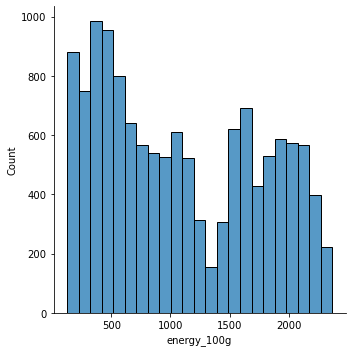

<Figure size 432x288 with 0 Axes>

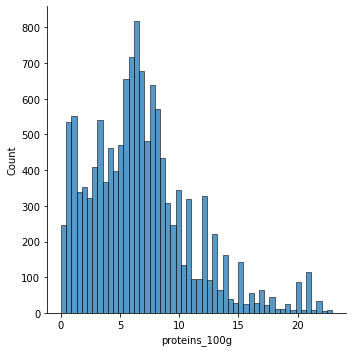

<Figure size 432x288 with 0 Axes>

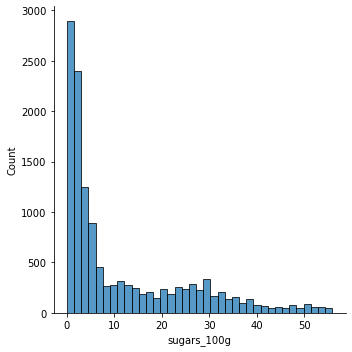

<Figure size 432x288 with 0 Axes>

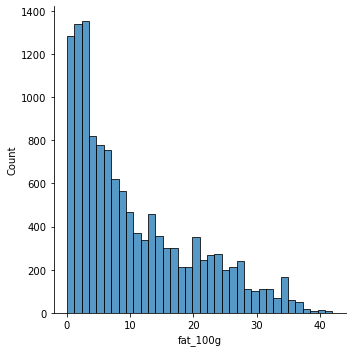

<Figure size 432x288 with 0 Axes>

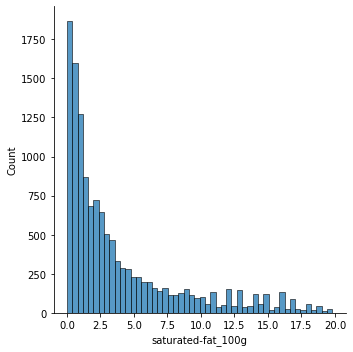

<Figure size 432x288 with 0 Axes>

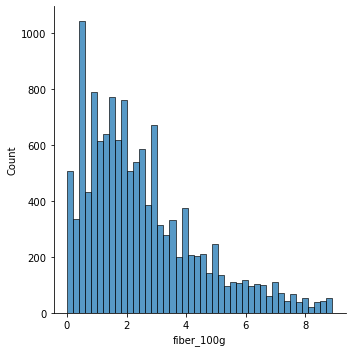

<Figure size 432x288 with 0 Axes>

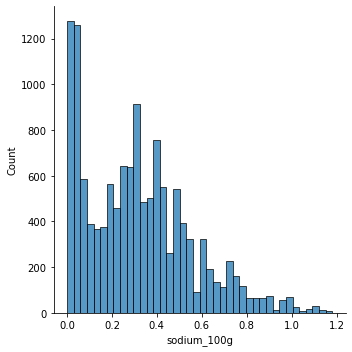

<Figure size 432x288 with 0 Axes>

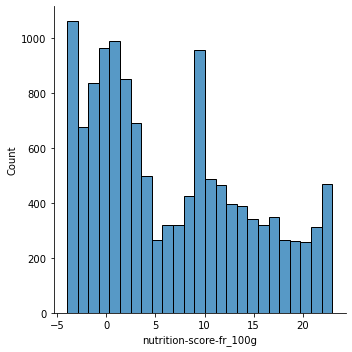

In [39]:
for col in df_travail4.select_dtypes('float'):
    plt.figure()
    sns.displot(df_travail4[col])

**on remarque une forte dispersion pour chacune des courbes, et aucune qui ne semble suivre une loi normale**

(à part peut-être pour le sodium si on excepte la valeur 0)

## observation de la variable qualitative (nutrigrade)

In [40]:
df_test = df_travail4.copy()

In [41]:
df_travail4 = df_travail4.sort_values('nutrition_grade_fr')

<AxesSubplot:>

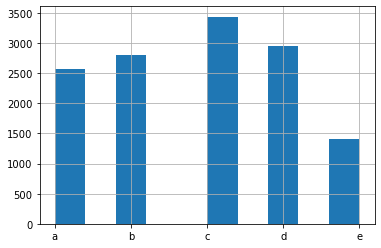

In [42]:
plt.figure()
df_travail4['nutrition_grade_fr'].hist()


In [43]:
df_travail4.groupby(by  = 'nutrition_grade_fr').mean()

energy_100g  proteins_100g  sugars_100g   fat_100g  \
nutrition_grade_fr                                                       
a                    723.483294       6.959808     3.697393   3.928148   
b                    646.055853       5.763072     4.842309   5.208331   
c                   1037.084197       6.956178     9.770187   9.512599   
d                   1545.683875       7.231734    18.741354  17.261585   
e                   1852.416537       6.512122    29.414217  23.041306   

                    saturated-fat_100g  fiber_100g  sodium_100g  \
nutrition_grade_fr                                                
a                             0.809167    2.888109     0.221938   
b                             1.334411    1.947870     0.296131   
c                             2.612184    2.579039     0.362596   
d                             6.542631    2.680629     0.370348   
e                            12.142974    2.735177     0.266437   

                    nutrition-score-fr_100g  
nutrition_grade_fr                           
a                                 -2.290888  
b                                  0.949911  
c                                  6.308207  
d                                 14.011518  
e                                 20.342796

**en faisant ce "groupby", on observe bien les corrélations attendues entre:**
- un taux de sucres et de graisses élevés donnent un nutrition_grade de "e"
- a contrario, un taux de graisses faibles (et de sucres) donnent un nutrition_grade de "a"

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='nutrition-score-fr_100g'>

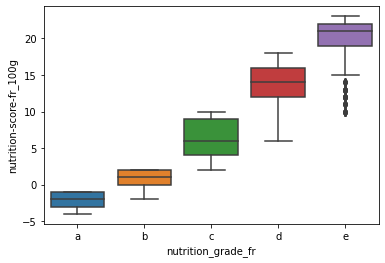

In [44]:
sns.boxplot(x='nutrition_grade_fr', y='nutrition-score-fr_100g', data = df_travail4)

# Analyse bivariée (ANOVA)

In [45]:
import scipy.stats as stat
data_a_energy = df_travail4['energy_100g'][df_travail4['nutrition_grade_fr']=='a']
data_b_energy = df_travail4['energy_100g'][df_travail4['nutrition_grade_fr']=='b']
#data_b_energy = df_travail4[df_travail4['nutrition_grade_fr']=='b']['energy_100g']
data_c_energy = df_travail4['energy_100g'][df_travail4['nutrition_grade_fr']=='c']
#data_d_energy = df_travail4[df_travail4['nutrition_grade_fr']=='d']['energy_100g']
#data_e_energy = df_travail4[df_travail4['nutrition_grade_fr']=='e']['energy_100g']

In [46]:
data_a_ns = df_travail4['nutrition-score-fr_100g'][df_travail4['nutrition_grade_fr']=='a']
data_b_ns = df_travail4['nutrition-score-fr_100g'][df_travail4['nutrition_grade_fr']=='b']

In [47]:
print (stat.f_oneway( data_a_ns, data_b_ns))

F_onewayResult(statistic=14831.866715284736, pvalue=0.0)


In [48]:
print (stat.f_oneway( data_a_energy, data_b_energy))

F_onewayResult(statistic=40.05834324444558, pvalue=2.665238264954294e-10)


In [49]:
sample_a = data_a_energy.sample( n = 150)
sample_b = data_b_energy.sample( n = 150)
sample_c = data_c_energy.sample( n = 150)

In [50]:
print (stat.f_oneway(sample_a, sample_c))

F_onewayResult(statistic=20.112183435143052, pvalue=1.0434876011686271e-05)


In [51]:
import scipy.stats as stat
data_a_s_fat = df_travail4[df_travail4['nutrition_grade_fr']=='a']['saturated-fat_100g']
data_b_s_fat = df_travail4[df_travail4['nutrition_grade_fr']=='b']['saturated-fat_100g']
data_c_s_fat = df_travail4[df_travail4['nutrition_grade_fr']=='c']['saturated-fat_100g']
data_d_s_fat = df_travail4[df_travail4['nutrition_grade_fr']=='d']['saturated-fat_100g']
data_e_s_fat = df_travail4[df_travail4['nutrition_grade_fr']=='e']['saturated-fat_100g']

In [52]:
print (stat.f_oneway( data_a_s_fat, data_b_s_fat))

F_onewayResult(statistic=421.86530686595495, pvalue=2.6523267247577134e-90)


In [53]:
import scipy.stats as stat
data_a_ns = df_travail4[df_travail4['nutrition_grade_fr']=='a']['nutrition-score-fr_100g']
data_b_ns = df_travail4[df_travail4['nutrition_grade_fr']=='b']['nutrition-score-fr_100g']
data_c_ns = df_travail4[df_travail4['nutrition_grade_fr']=='c']['nutrition-score-fr_100g']
data_d_ns = df_travail4[df_travail4['nutrition_grade_fr']=='d']['nutrition-score-fr_100g']
data_e_ns = df_travail4[df_travail4['nutrition_grade_fr']=='e']['nutrition-score-fr_100g']

In [54]:
print (stat.f_oneway(data_a_ns , data_b_ns, data_c_ns, data_d_ns, data_e_ns ))

F_onewayResult(statistic=44921.58998225341, pvalue=0.0)


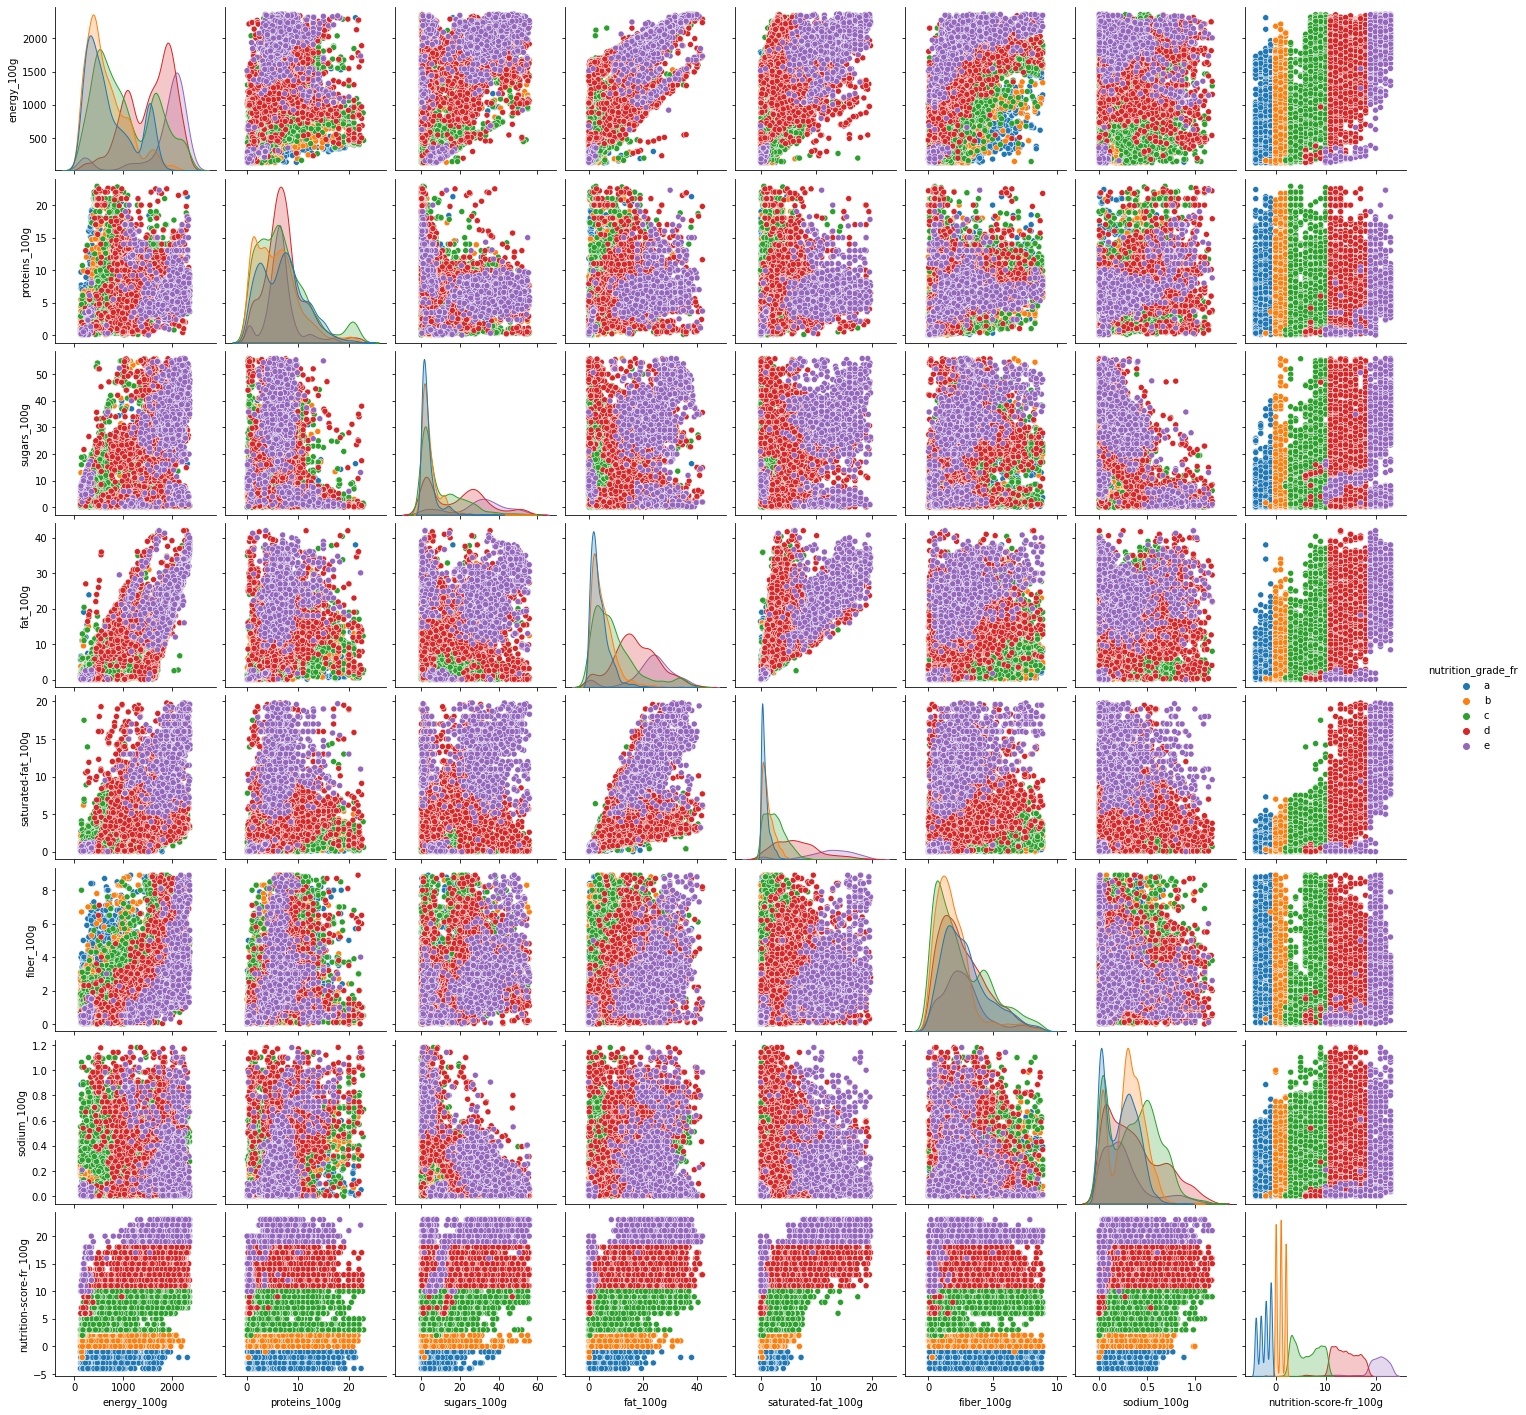

In [55]:
sns.pairplot(df_travail4, hue= 'nutrition_grade_fr')

**... certains graphiques laissent perplexes:**
- le "nutrition-score" en fonction de l'energie laisse à penser qu'il pourrait y avoir des (points A - points C)  < -10

( A et C à ne pas confondre avec le "nutrition_grade" a et c (cf document relatif à l'étude du Pr Hercberg)

> il faudrait une étude plus poussée de "l'algorithme" qui calcule le nutriscore (le nombre) pour en savoir plus...

**...d'autres par contre ont leur pleine logique**: (analyse univariée)
- il est logique que "b" ait un faible écart-type puisqu'il ne peut prendre que 3 valeurs entre 0 et 2
- de la même façon, que le sodium (sel), les sucres et les graisses soient faibles pour "a" est également logique

- le diagramme en "triangle entre les graisses saturées/non-saturées nous invite à en savoir davantage! (la question étant: comment?) !!


<AxesSubplot:>

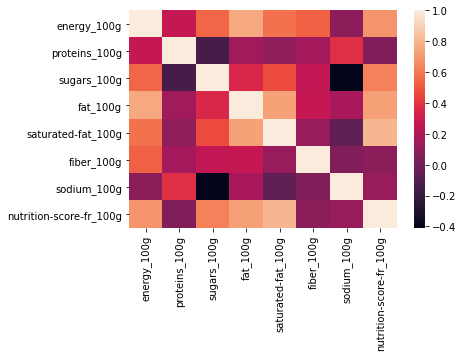

In [56]:
sns.heatmap(df_travail4.corr())

In [57]:
df_travail4.shape

(13160, 10)

In [58]:
df_travail4.head()

product_name nutrition_grade_fr  \
320751                Tartines craquantes bio au sarrasin                  a   
212627              Petit Repas Pommes de terre au jambon                  a   
212628  Petits repas Légumes & Volaille à la basquaise...                  a   
212642  Paëlla Poulet, Chorizo, Fruits de mer, à l'hui...                  a   
270562                                       Top Porridge                  a   

        energy_100g  proteins_100g  sugars_100g  fat_100g  saturated-fat_100g  \
320751       1643.0           13.0          2.6       2.8                 0.6   
212627        299.0            2.8          0.6       2.2                 0.7   
212628        272.0            2.8          2.6       2.0                 0.3   
212642        623.0            9.0          0.8       5.9                 1.7   
270562       1527.0           18.4         14.3       6.3                 1.1   

        fiber_100g  sodium_100g  nutrition-score-fr_100g  
320751         5.9     0.267717                     -4.0  
212627         1.7     0.110236                     -2.0  
212628         1.8     0.110236                     -2.0  
212642         3.0     0.311024                     -4.0  
270562         6.6     0.145669                     -1.0

In [59]:
df_travail4.dtypes

product_name                object
nutrition_grade_fr          object
energy_100g                float64
proteins_100g              float64
sugars_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
fiber_100g                 float64
sodium_100g                float64
nutrition-score-fr_100g    float64
dtype: object

# Anlyse Multivariée , ACP

**je fais d'abord une copie du df_travail4 des fois que j'en aie besoin par la suite**

In [60]:
df_travail5 = df_travail4.copy()

In [61]:
df_travail5.head()

product_name nutrition_grade_fr  \
320751                Tartines craquantes bio au sarrasin                  a   
212627              Petit Repas Pommes de terre au jambon                  a   
212628  Petits repas Légumes & Volaille à la basquaise...                  a   
212642  Paëlla Poulet, Chorizo, Fruits de mer, à l'hui...                  a   
270562                                       Top Porridge                  a   

        energy_100g  proteins_100g  sugars_100g  fat_100g  saturated-fat_100g  \
320751       1643.0           13.0          2.6       2.8                 0.6   
212627        299.0            2.8          0.6       2.2                 0.7   
212628        272.0            2.8          2.6       2.0                 0.3   
212642        623.0            9.0          0.8       5.9                 1.7   
270562       1527.0           18.4         14.3       6.3                 1.1   

        fiber_100g  sodium_100g  nutrition-score-fr_100g  
320751         5.9     0.267717                     -4.0  
212627         1.7     0.110236                     -2.0  
212628         1.8     0.110236                     -2.0  
212642         3.0     0.311024                     -4.0  
270562         6.6     0.145669                     -1.0

**je remplace les lettres du nutrigrade par des chiffres, pour pouvoir travailler dessus plus tard (K-means)**

In [62]:
df_travail5['nutrition_grade_fr'].replace(['a', 'b', 'c', 'd', 'e'], [1,2,3,4,5], inplace = True)

In [63]:
df_travail5 = df_travail5.set_index('product_name')

In [64]:
n=df_travail5.shape[0]
p=df_travail5.shape[1]
n,p

(13160, 9)

In [65]:
# Je vérifie que le "nutrigrade" est bien un entier à présent
df_travail5.dtypes

nutrition_grade_fr           int64
energy_100g                float64
proteins_100g              float64
sugars_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
fiber_100g                 float64
sodium_100g                float64
nutrition-score-fr_100g    float64
dtype: object

In [66]:
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(df_travail5.values)
print(Z)

[[-1.44297814  0.82868857  1.44674928 ...  1.78098481 -0.1881548
  -1.39878909]
 [-1.44297814 -1.20083551 -0.90222688 ... -0.44843372 -0.85015961
  -1.13788903]
 [-1.44297814 -1.2416072  -0.90222688 ... -0.39535233 -0.85015961
  -1.13788903]
 ...
 [ 1.70112424  1.73321605 -0.0501473  ... -0.28918954  0.25869844
   1.99291165]
 [ 1.70112424  0.67315213 -0.41861414 ... -1.29773602 -0.81705937
   1.60156157]
 [ 1.70112424 -1.36996251 -1.43189798 ... -1.08541045 -1.29254432
   0.68841137]]


In [67]:
Z.shape

(13160, 9)

In [68]:
print(np.mean(Z,axis=0))

[ 0.00000000e+00 -2.76442159e-16  1.07985218e-16  1.38221079e-16
  1.38221079e-16 -1.38221079e-16  2.28928663e-16  3.45552698e-17
 -6.91105396e-17]


In [69]:
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [70]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [71]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

9


In [72]:
print(coord)

[[-1.37225705  1.53378916  2.57862576 ... -0.51076354 -0.34739898
  -0.11863222]
 [-2.67273831 -0.9314617   0.12220334 ...  0.03762609 -0.0820047
   0.20474736]
 [-2.67794763 -0.98376747  0.19952655 ...  0.12250838 -0.04012203
   0.21044824]
 ...
 [ 4.33727262 -0.03235581 -1.12627646 ... -0.17565844 -0.59077096
  -0.07156918]
 [ 3.46673932 -1.36740325 -1.79515761 ...  0.03868344 -0.20588784
  -0.23790963]
 [-0.6710282  -2.24745136 -1.55695092 ... -1.18189874  1.28585257
   0.11021871]]


In [73]:
len(coord[0])

9

In [74]:
coord.shape

(13160, 9)

In [75]:
df_projected = pd.DataFrame(coord, index= df_travail5.index, columns=['F'+str(i+1) for i in range(9)])

In [76]:
df_projected.head()

F1        F2  \
product_name                                                             
Tartines craquantes bio au sarrasin                -1.372257  1.533789   
Petit Repas Pommes de terre au jambon              -2.672738 -0.931462   
Petits repas Légumes & Volaille à la basquaise ... -2.677948 -0.983767   
Paëlla Poulet, Chorizo, Fruits de mer, à l'huil... -2.105350  0.688821   
Top Porridge                                       -0.664804  1.652933   

                                                          F3        F4  \
product_name                                                             
Tartines craquantes bio au sarrasin                 2.578626  0.632308   
Petit Repas Pommes de terre au jambon               0.122203 -0.150317   
Petits repas Légumes & Volaille à la basquaise ...  0.199527 -0.152363   
Paëlla Poulet, Chorizo, Fruits de mer, à l'huil...  0.712317  0.324753   
Top Porridge                                        3.164062  1.789924   

                                                          F5        F6  \
product_name                                                             
Tartines craquantes bio au sarrasin                -0.160555  0.042369   
Petit Repas Pommes de terre au jambon              -0.659202  0.046494   
Petits repas Légumes & Volaille à la basquaise ... -0.528914  0.038954   
Paëlla Poulet, Chorizo, Fruits de mer, à l'huil... -0.574170  0.163492   
Top Porridge                                        0.077446  0.212351   

                                                          F7        F8  \
product_name                                                             
Tartines craquantes bio au sarrasin                -0.510764 -0.347399   
Petit Repas Pommes de terre au jambon               0.037626 -0.082005   
Petits repas Légumes & Volaille à la basquaise ...  0.122508 -0.040122   
Paëlla Poulet, Chorizo, Fruits de mer, à l'huil...  0.346053 -0.103098   
Top Porridge                                        0.079887  0.180135   

                                                          F9  
product_name                                                  
Tartines craquantes bio au sarrasin                -0.118632  
Petit Repas Pommes de terre au jambon               0.204747  
Petits repas Légumes & Volaille à la basquaise ...  0.210448  
Paëlla Poulet, Chorizo, Fruits de mer, à l'huil... -0.110533  
Top Porridge                                        0.224506

In [77]:
f1 =acp.components_[0]
print(f1)
f2 =acp.components_[1]
print(f2)

[0.41895253 0.40509753 0.0708155  0.32246872 0.40479156 0.40282147
 0.15452798 0.03024565 0.44772628]
[-0.05924613  0.14049778  0.5831792  -0.40406285  0.14377817 -0.06839321
  0.18955594  0.64000209 -0.05001582]


In [78]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

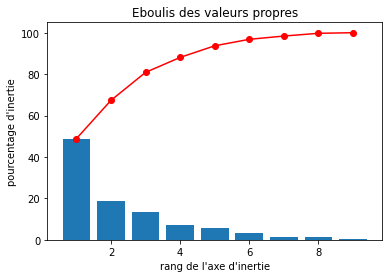

In [79]:
from sklearn import decomposition
from sklearn import preprocessing
display_scree_plot(acp)

In [80]:
f1 =acp.components_[0]
print(f1)
f2 =acp.components_[1]
print(f2)

[0.41895253 0.40509753 0.0708155  0.32246872 0.40479156 0.40282147
 0.15452798 0.03024565 0.44772628]
[-0.05924613  0.14049778  0.5831792  -0.40406285  0.14377817 -0.06839321
  0.18955594  0.64000209 -0.05001582]


In [81]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(16,16))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, illustrative_legend=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(10,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des aliments (coloration : "+illustrative_legend+") (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

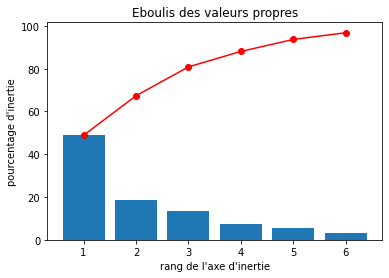

In [82]:
from sklearn import decomposition
from sklearn import preprocessing

# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=2)

# choix du nombre de composantes à calculer
n_comp = 6

# import de l'échantillon
data = df_travail5

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_travail5[['nutrition_grade_fr', 'energy_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'sodium_100g', 'nutrition-score-fr_100g']]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
data_pca = data_pca.dropna()

X = data_pca.values
#names = data["idCours"] # ou data.index pour avoir les intitulés

#features = data.columns
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

**F1, F2 et F3 captent à eux seuls plus de 70% de la dispersion (variance) totale: on peut se contenter de ces trois axes**

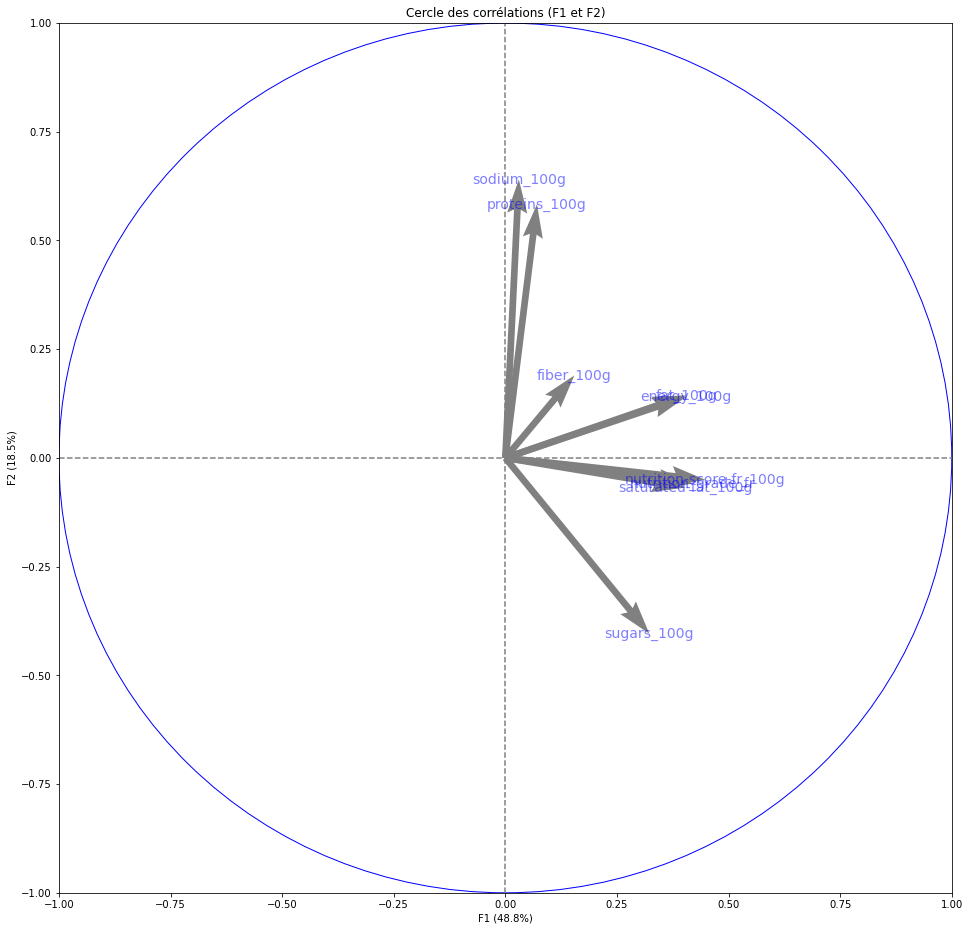

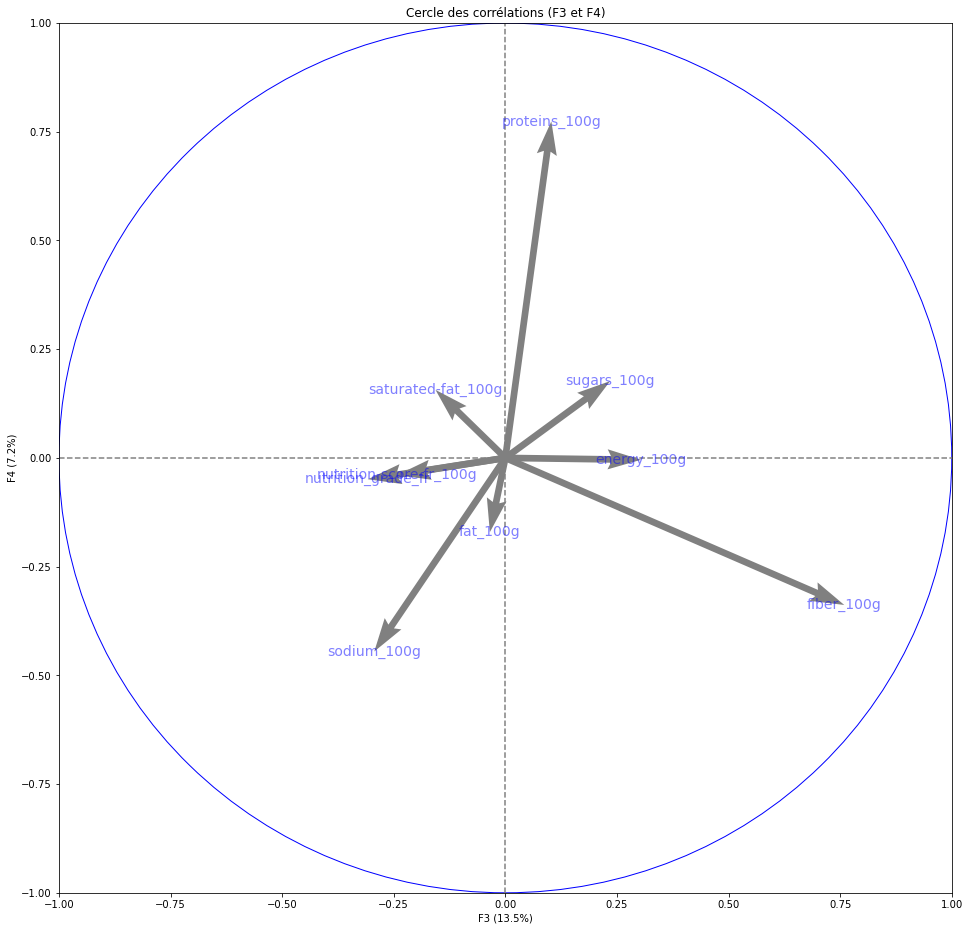

In [83]:
# Cercle des corrélations
pcs = pca.components_
#plt.figure(figsize=(16,10))
plt.rcParams["figure.figsize"] = [16,9]
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

### 1ère conclusion:
- on voit (ouf!) qu'il y a une parfaite corrélation entre le nutriscore et le nutrigrade
- mais on voit surtout une corrélation entre les graisses (fat_100g) et le nutrigrade, qu'on pourrait étudier avec un test de Student

In [84]:
import scipy.stats as stats
X1 = df_travail5['nutrition_grade_fr']
X2 = df_travail5['fat_100g']
y = stats.ttest_ind(X1,X2) ; print(y)
X1.shape

Ttest_indResult(statistic=-94.21027545058314, pvalue=0.0)


(13160,)

## ? WTF : la p-value indiquant 0, on doit rejeter l'hypothèse nulle et donc: pas de corrélation entre nutrigrade et fat???

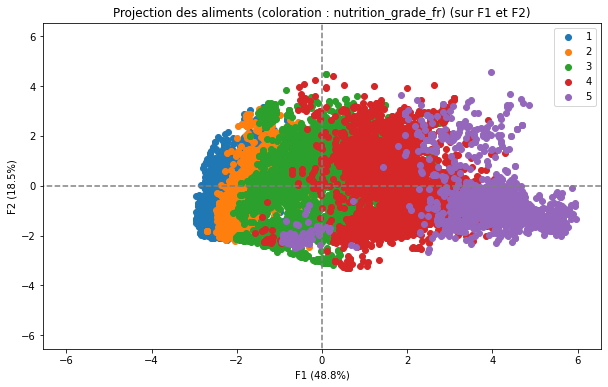

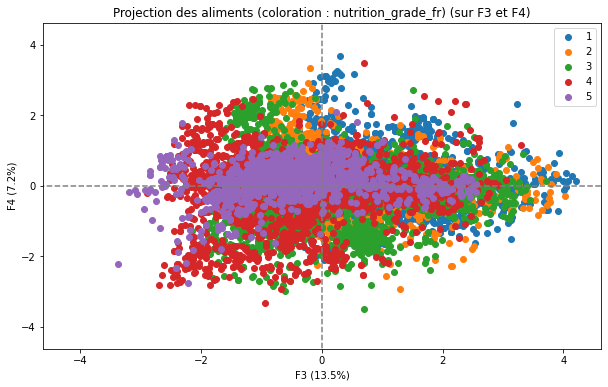

In [85]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var=data_pca[['nutrition_grade_fr']].values[:,0], illustrative_legend='nutrition_grade_fr')


plt.show()

In [86]:
X_projected

array([[-1.37225705,  1.53378916,  2.57862576,  0.63230832, -0.16055507,
         0.042369  ],
       [-2.67273831, -0.9314617 ,  0.12220334, -0.1503169 , -0.65920177,
         0.04649386],
       [-2.67794763, -0.98376747,  0.19952655, -0.15236321, -0.52891433,
         0.03895406],
       ...,
       [ 4.33727262, -0.03235581, -1.12627646, -0.02276101, -0.9887938 ,
         0.10761239],
       [ 3.46673932, -1.36740325, -1.79515761,  0.61401129, -1.25853267,
         0.20728712],
       [-0.6710282 , -2.24745136, -1.55695092, -0.23580044,  0.97128145,
         0.33836995]])

<AxesSubplot:>

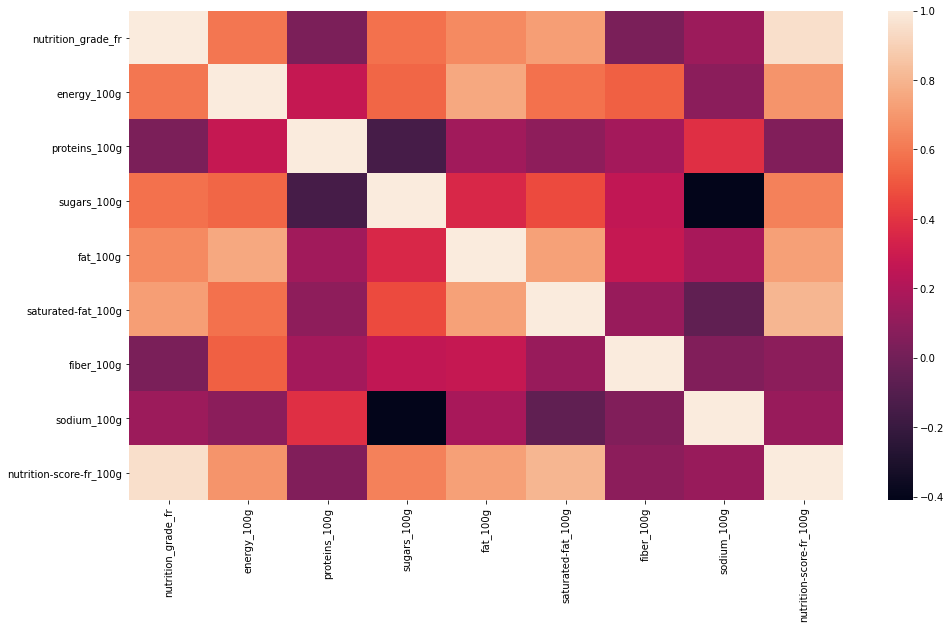

In [87]:
sns.heatmap(df_travail5.corr())

# Utilisation de l'algorithme K-means pour regrouper les 5 clusters comme autant de nuntrigrades

In [88]:
from sklearn.cluster import KMeans
num_components = 7
principalDf = pd.DataFrame(X_projected, columns = range(1,num_components))
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 9
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(principalDf).score(principalDf) for i in range(len(kmeans_tests))]

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
model = KNeighborsClassifier()

In [91]:
y= df_travail5['nutrition_grade_fr']
X = df_travail5.drop(['nutrition_grade_fr'], axis = 1)

In [92]:
model.fit(X,y)

KNeighborsClassifier()

In [93]:
model.predict(X)

array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

In [94]:
model.score(X,y)

0.86580547112462

In [95]:
import random
n = random.randint(0, 13159)
features = X.iloc[n]
features, n

(energy_100g                155.0
 proteins_100g                0.9
 sugars_100g                  1.4
 fat_100g                     1.2
 saturated-fat_100g           0.4
 fiber_100g                   1.7
 sodium_100g                  0.7
 nutrition-score-fr_100g      4.0
 Name: Pur Soup' - Mouliné de 7 légumes variés, dtype: float64,
 7859)

In [96]:
def nutriscore (model, list):
    x = np.array([list]).reshape(1, len(list))
    print(model.predict(x))
    print(model.predict_proba(x))

In [97]:
nutriscore(model, features)

[3]
[[0.  0.2 0.8 0.  0. ]]


In [98]:
from sklearn.cluster import KMeans

In [99]:
model_c = KMeans (n_clusters=5 )
model_c.fit(X_projected)

KMeans(n_clusters=5)

In [100]:
model_c.predict(X_projected)

array([3, 1, 1, ..., 0, 0, 1])

In [101]:
palette = ['blue', 'orange', 'green', 'red', 'purple' ]

C:\Users\psiam\anaconda3\envs\OpenFood2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

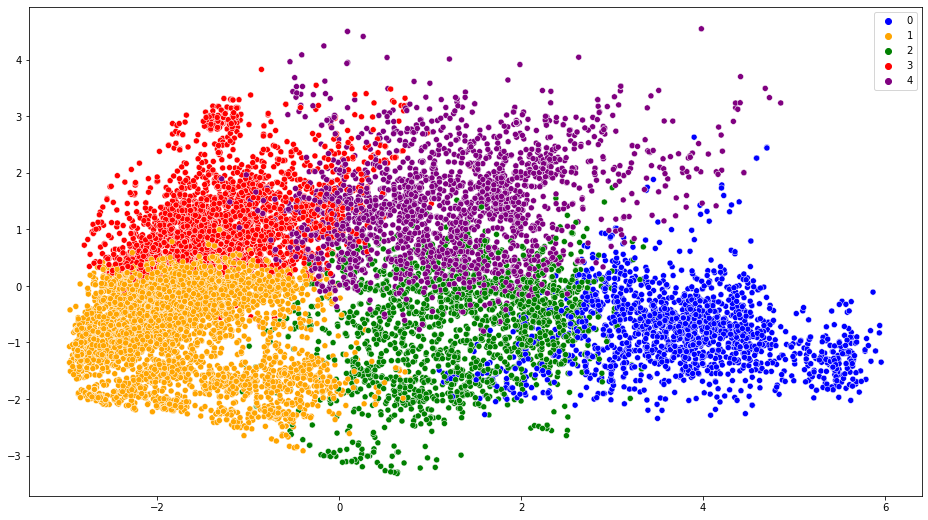

In [102]:
sns.scatterplot(X_projected[:,0], X_projected[:,1], hue=model_c.predict(X_projected), palette = palette)

C:\Users\psiam\anaconda3\envs\OpenFood2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

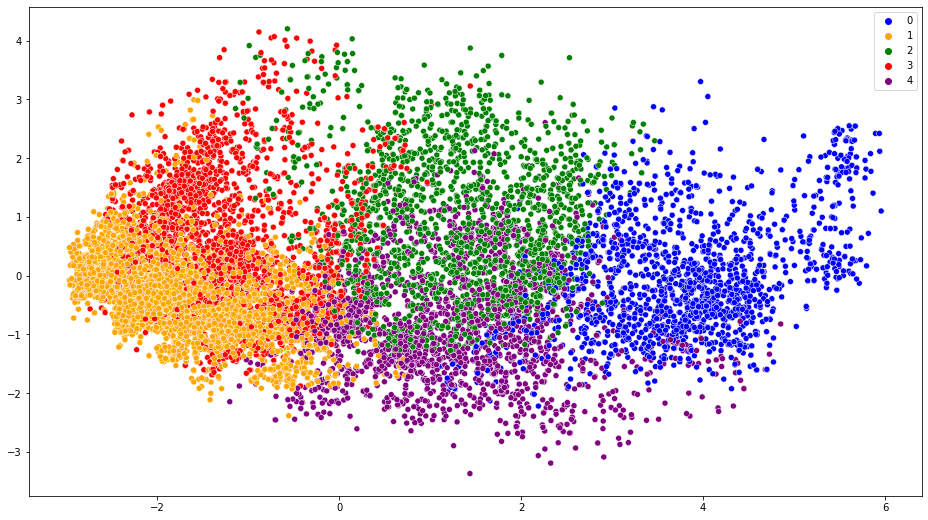

In [103]:
sns.scatterplot(X_projected[:,0], X_projected[:,2], hue=model_c.predict(X_projected), palette = palette)

C:\Users\psiam\anaconda3\envs\OpenFood2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

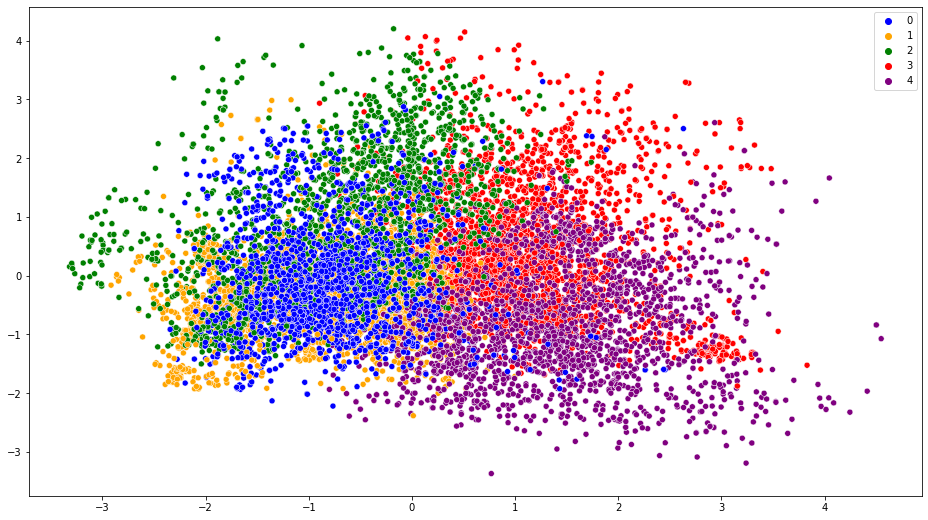

In [104]:
sns.scatterplot(X_projected[:,1], X_projected[:,2], hue=model_c.predict(X_projected), palette = palette)

# Commentaire:
- **quand on compare les 3 graphiques ci-dessus avec les 2 premiers concernant la projection des individus.... on ne retrouve pas ses petits (cf couleurs...)**
- **on voit qu'entre F2 et F3, les individus sont éparpillés: perte d'information**

In [105]:
X_projected

array([[-1.37225705,  1.53378916,  2.57862576,  0.63230832, -0.16055507,
         0.042369  ],
       [-2.67273831, -0.9314617 ,  0.12220334, -0.1503169 , -0.65920177,
         0.04649386],
       [-2.67794763, -0.98376747,  0.19952655, -0.15236321, -0.52891433,
         0.03895406],
       ...,
       [ 4.33727262, -0.03235581, -1.12627646, -0.02276101, -0.9887938 ,
         0.10761239],
       [ 3.46673932, -1.36740325, -1.79515761,  0.61401129, -1.25853267,
         0.20728712],
       [-0.6710282 , -2.24745136, -1.55695092, -0.23580044,  0.97128145,
         0.33836995]])

# Représentations des individus en 3D delon F1, F2 et F3

## 1) de façon projective

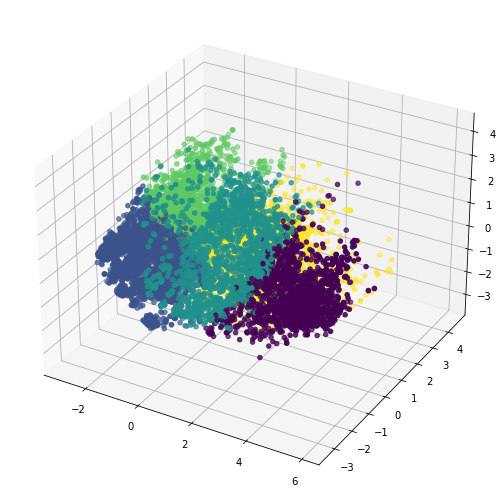

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = X_projected[:,0]
y = X_projected[:,1]
z = X_projected[:,2]

ax.scatter(x, y, z,c=model_c.predict(X_projected))

plt.show()

## 2) avec une carte interactive

In [107]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [108]:
import ipyvolume as ipv

In [109]:
import ipyvolume.pylab as p3
import numpy as np
import matplotlib.cm
#points
x = X_projected[:,0]
y = X_projected[:,1]
z = X_projected[:,2]

#colors
colormap = matplotlib.cm.viridis
c = colormap(model_c.predict(X_projected)/4, len(x))
p3.clear()
p3.scatter(x, y, z, color=c, size=3)
p3.show()